# __Model Visualisation__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In [1]:
import os
os.chdir(os.environ["PYTHONPATH"])

import torch
import matplotlib.pyplot as plt

import scripts.data_vis as dv
import scripts.model as model

%load_ext autoreload
%autoreload 2

In [2]:
DECODER_PATH = "./models/best_models/best_model_e128_a256_d512_lr0.0003-extended_with_loss.pth"

In [3]:
def load_decoder(state_path: str) -> model.LSTMDecoder:
    decoder_state = torch.load(state_path, map_location=torch.device("cpu"))["decoder"]

    num_embeddings = decoder_state["word_embedding.weight"].shape[0]
    embedding_dim = decoder_state["word_embedding.weight"].shape[1]
    encoder_dim = 196
    attention_dim = decoder_state["attention.W_1.weight"].shape[0]
    decoder_dim = decoder_state["init_c.weight"].shape[0]

    decoder = model.LSTMDecoder(
        num_embeddings, embedding_dim, encoder_dim, decoder_dim, attention_dim
    )
    decoder.load_state_dict(decoder_state)

    return decoder

In [4]:
decoder = load_decoder(DECODER_PATH)
embeddings = decoder.word_embedding.weight.detach().numpy()

E_reduced = dv.reduce_to_k_dim(embeddings)

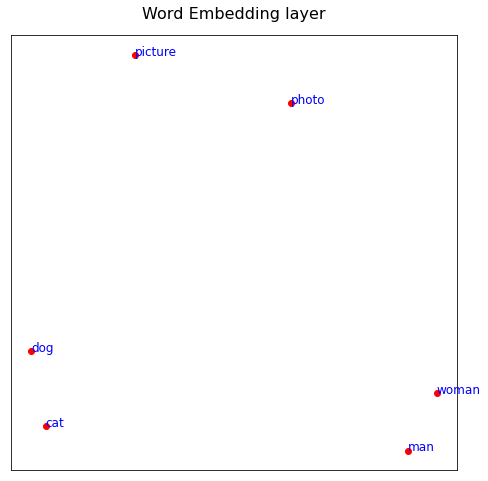

In [5]:
plt.rcParams["figure.figsize"] = (8, 8)

plt.title("Word Embedding layer", fontsize=16, y=1.025)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

dv.plot_embeddings(E_reduced, ["cat", "dog", "woman", "man", "photo", "picture"])